http://cs229.stanford.edu/notes2021spring/notes2021spring/Decision_Trees_CS229.pdf

In [120]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

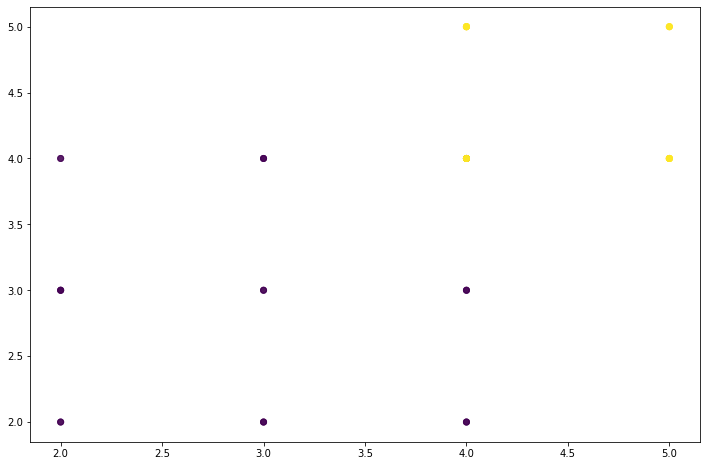

In [121]:
np.random.seed(12)
num_observations = 50

# todo: check the np.random.multivariate normal function
# np.hstack
x1 = np.random.randint(low =2, high = 5, size=(num_observations, 2))
x2 = np.random.randint(low =4, high = 6, size=(num_observations, 2))

X = np.vstack((x1, x2))
y = np.hstack((np.zeros(num_observations),
               np.ones(num_observations)))

#Displaying the output
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = .4)

In [122]:
def giniscore(X, y):
    dict_= dict.fromkeys(list(set(y)), 0)
    for key in dict_.keys():
        dict_[key] = np.array([elem for idx, elem in enumerate(X) if y[idx] ==key])
    return 1-sum([(i.shape[0]/X.shape[0])**2 for i in dict_.values()])

In [303]:
# make the classification based on X level

def spliting(X, y, gini_base =1):
    dict_ = {}
     
    for j in range(X.shape[1]): ## the features 
        
        #for i in sorted(set(X[:,j]))[1:]: ## spliting criteria
        range_ = sorted(set(X[:,j]))
        for i in np.arange(range_[0], range_[-1], 0.5)[1:]:
            
            left_x = np.array([elem for idx, elem in enumerate(X) if X[idx,j] <i])
            left_y = np.array([y[idx] for idx, elem in enumerate(X) if X[idx,j] <i])
            right_x = np.array([elem for idx, elem in enumerate(X) if X[idx,j] >=i])
            right_y = np.array([y[idx] for idx, elem in enumerate(X) if X[idx,j] >=i])

            left_ratio, right_ratio = left_y.shape[0]/y.shape[0], right_y.shape[0]/y.shape[0]
            res = left_ratio*giniscore(left_x, left_y) + right_ratio*giniscore(right_x, right_y)
            dict_[(j,i)] = res

    # result
    res = dict(sorted(dict_.items(), key=lambda item: item[1]))
    keys = list(res.keys())
    primary_key = keys[0]
    
    gini_current = list(res.values())[0]
    gini_gain = gini_base - gini_current
    gini_base = gini_current
    
    if gini_gain >0:
        j, i = primary_key[0], primary_key[1]
        left_x = np.array([elem for idx, elem in enumerate(X) if X[idx,j] <i])
        left_y = np.array([y[idx] for idx, elem in enumerate(X) if X[idx,j] <i])
        right_x = np.array([elem for idx, elem in enumerate(X) if X[idx,j] >=i])
        right_y = np.array([y[idx] for idx, elem in enumerate(X) if X[idx,j] >=i])
        return primary_key, gini_base, left_x, left_y, right_x, right_y
    else:
        return None, None, None, None, None, None
    

In [305]:
np.arange(range_[0], range_[-1], 0.5)

array([3. , 3.5, 4. , 4.5])

In [312]:
def grow_tree(X, y, nodes =[]):
    primary_key, gini_base, left_x, left_y, right_x, right_y = spliting(X, y)
    nodes.append(primary_key)
         
    if len(set(left_x.flatten()))!=1 and len(set(left_y)) !=1:
        grow_tree(left_x, left_y, nodes)
        
    if len(set(right_x.flatten()))!=1 and len(set(right_y)) !=1:
        grow_tree(right_x, right_y, nodes)
    
    return nodes

In [313]:
nodes = grow_tree(X, y)

In [314]:
nodes

[(1, 3.5), (0, 3.5), (0, 4.5), (1, 4.5)]

In [315]:
from sklearn import tree

In [316]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(111.60000000000001, 195.696, 'X[1] <= 3.5\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(55.800000000000004, 152.208, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(167.4, 152.208, 'X[0] <= 3.5\ngini = 0.355\nsamples = 65\nvalue = [15, 50]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(223.20000000000002, 108.72, 'X[0] <= 4.5\ngini = 0.165\nsamples = 55\nvalue = [5, 50]'),
 Text(167.4, 65.232, 'X[1] <= 4.5\ngini = 0.245\nsamples = 35\nvalue = [5, 30]'),
 Text(111.60000000000001, 21.744, 'gini = 0.34\nsamples = 23\nvalue = [5, 18]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(279.0, 65.232, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

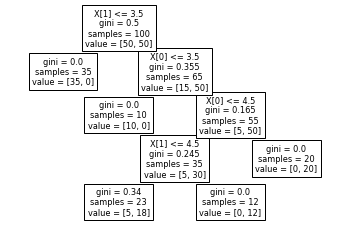

In [317]:
tree.plot_tree(clf) 

In [311]:
nodes

[(1, 3.5), (0, 3.5), (0, 4.5), (1, 4.5)]